# Fetal health Classification

The purpose of this code notebook is to clean and prepare the fetal health classification data into a useable format to predict fetal health outcomes accurately using Cardiotocograms (CTGs) data to prevent or decrease child and maternal mortality.

A decrease in the child mortality rate is one of the United Nations’ Sustainable Development Goals. Parallel to the notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

Cardiotocograms (CTGs) can be used as a simple and cost-effective method for assessing fetal health and taking action to prevent child and maternal mortality. CTGs work by sending ultrasound pulses and reading their response to gather information about the fetal heart rate (FHR), fetal movements, uterine contractions, and other factors.

Cardiotocogram (CTG) is the most widely used in the clinical routine evaluation to detect fetal state and has enabled clinical practitioners to detect signs of fetal compromise at an early stage. It provides information on uterine respiration and fetal heart rate, which can be used to determine whether the fetus is healthy, suspect, or pathological.

Having a predictive model would be a valuable tool for the healthcare industry. This healthcare facility wants to make an impact by being able to predict fetal health outcomes which would in the end prevent or decrease child and maternal mortality. 

### Dataset:

The dataset is from Kaggle and contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetricians into 3 classes: Normal, Suspect, and Pathological.

The data description is detailed below:

- baseline_value: Baseline Fetal Heart Rate (FHR)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of LDs per second
- severe_decelerations: Number of SDs per second
- prolongued_decelerations: Number of PDs per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability: Mean value of long term variability
- histogram_width: Width of the histogram made using all values from a record
- histogram_min: Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks: Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeroes in the exam histogram
- histogram_mode: Histogram mode
- histogram_mean: Histogram mean
- histogram_median: Histogram median
- histogram_variance: Histogram variance
- histogram_tendency: Histogram trend
- fetal_health: Fetal health:
   - 1 - Normal
   - 2 - Suspect
   - 3 - Pathological

### Citation:
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (Link9:5%3C311::AID-MFM12%3E3.0.CO;2-9))


## PART THREE

## Preprocessing and Training Data Development

Remember the question we are trying to answer: **To predict fetal health outcomes accurately using Cardiotocograms (CTGs) data to prevent or decrease child and maternal mortality.**

Preprocessing and Training Data Development Task:

1. Create a dummy or indicator features for categorical variables. Use get_dummies().
2. Standardize the magnitude of numeric features using a scaler. Make a scaler object and fit the data to the scaler object.
3. Split into a testing and training datasets.

Goal: Create a cleaned development dataset that can be use to complete the modeling step of the project. This step prepares the data for fitting models.

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display

from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.proportion import proportions_ztest
#import ydata_profiling
#!pip install termcolor
#from termcolor import colored
#!pip install colorama
from colorama import Fore, Back, Style
import statsmodels.stats.weightstats as ws

from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Other Imports
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from numpy.random import seed
import tensorflow as tf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,f1_score 
#from sklearn.learning_curve import validation_curve


This is the best place to put all the libraries needed for the project.

In [2]:
fhc_dataset2 = pd.read_csv('archive/fetal_health.csv')

In [3]:
fhc_dataset2 = fhc_dataset2.rename(columns={"baseline value":
                             "baseline_value"}) 

In [4]:
fhc_dataset2.head().T

,0,1,2,3,4
baseline_value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


In [5]:
fhc_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
fhc_dataset2.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


The fhc_dataset have feature values that range from 0 - 1 or 0 - >100. The data needs to undergo min/max scaling to make it consistent and standardize the magnitude of numeric features using a scaler.


In [7]:
#Scaling the data; all the features will get scaled except fetal_health; give all column names except the last one
cols = fhc_dataset2.columns[:-1]
# retrieve just the numeric input values for the features excluding fetal_health; get all column data/values except the last one
# creates a numpy 2d-array
data = fhc_dataset2.values[:, :-1]                   
# perform a robust scaler transform of the data using MinMaxScaler()
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the numpy 2d-array back to a dataframe; then re-lable the columns back to original names
fhc_dataset3 = DataFrame(data)
fhc_dataset3.set_axis(cols[:], axis=1, inplace=True)
fhc_dataset3.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,0.505627,0.182238,0.0,0.370370,0.500000,0.629630,1.0
accelerations,2126.0,0.167277,0.203452,0.0,0.000000,0.105263,0.315789,1.0
fetal_movement,2126.0,0.019710,0.097018,0.0,0.000000,0.000000,0.006237,1.0
uterine_contractions,2126.0,0.291094,0.196405,0.0,0.133333,0.266667,0.466667,1.0
light_decelerations,2126.0,0.125964,0.197347,0.0,0.000000,0.000000,0.200000,1.0
severe_decelerations,2126.0,0.003293,0.057300,0.0,0.000000,0.000000,0.000000,1.0
prolongued_decelerations,2126.0,0.031703,0.117990,0.0,0.000000,0.000000,0.000000,1.0
abnormal_short_term_variability,2126.0,0.466535,0.229238,0.0,0.266667,0.493333,0.653333,1.0
mean_value_of_short_term_variability,2126.0,0.166586,0.129888,0.0,0.073529,0.147059,0.220588,1.0
percentage_of_time_with_abnormal_long_term_variability,2126.0,0.108205,0.202164,0.0,0.000000,0.000000,0.120879,1.0


Reminder: fhc_dataset3 has all the data from fhc_dataset2 without the fetal_health column. All data in fhc_dataset3 has been scaled.

The following: we are re-adding fetal_health back into fhc_dataset3

In [8]:
fhc_dataset3['fetal_health']= fhc_dataset2['fetal_health']
fhc_dataset3.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,0.505627,0.182238,0.0,0.370370,0.500000,0.629630,1.0
accelerations,2126.0,0.167277,0.203452,0.0,0.000000,0.105263,0.315789,1.0
fetal_movement,2126.0,0.019710,0.097018,0.0,0.000000,0.000000,0.006237,1.0
uterine_contractions,2126.0,0.291094,0.196405,0.0,0.133333,0.266667,0.466667,1.0
light_decelerations,2126.0,0.125964,0.197347,0.0,0.000000,0.000000,0.200000,1.0
severe_decelerations,2126.0,0.003293,0.057300,0.0,0.000000,0.000000,0.000000,1.0
prolongued_decelerations,2126.0,0.031703,0.117990,0.0,0.000000,0.000000,0.000000,1.0
abnormal_short_term_variability,2126.0,0.466535,0.229238,0.0,0.266667,0.493333,0.653333,1.0
mean_value_of_short_term_variability,2126.0,0.166586,0.129888,0.0,0.073529,0.147059,0.220588,1.0
percentage_of_time_with_abnormal_long_term_variability,2126.0,0.108205,0.202164,0.0,0.000000,0.000000,0.120879,1.0


Splitting the data into training and testing datasets in preparation to modeling. Our dependent or response variable is fetal_health. Here we are using a stratified split based on fetal_health. 

fetal_health has an imbalanced data with classes 2 (suspect) and 3 (pathological) being significantly smaller than class 1 (normal).

In [9]:
# doing a stratified split based on fetal_health
dfy = fhc_dataset3['fetal_health']
dfX = fhc_dataset3.copy()
dfX.drop('fetal_health', axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(dfX, dfy, stratify=dfy,
                                                train_size = 0.80,
                                                random_state = 42)

In [10]:
#inspecting the shape of the split data
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1700, 21) (426, 21) (1700,) (426,)


In [11]:
#inspecting the percentages for each of the target classes in the training data
ytrain.value_counts()/ytrain.shape[0] * 100.00

1.0    77.823529
2.0    13.882353
3.0     8.294118
Name: fetal_health, dtype: float64

In [12]:
#inspecting the percentages for each of the target classes in the test data. These values should closely match above
ytest.value_counts()/ytest.shape[0] * 100.00

1.0    77.934272
2.0    13.849765
3.0     8.215962
Name: fetal_health, dtype: float64

### SUMMARY

The following tasks were performed:

We started to import the libraries needed for preprocessing. Downloaded the dataset ('archive/fetal_health.csv').

Reviewed the top five of the cleaned dataset, the dtypes, and summary statistics of the the dataset.

The fhc_dataset have feature values that range from 0 - 1 or 0 - >100. The data needs to undergo min/max scaling to make it consistent and standardize the magnitude of numeric features using a scaler.

Scaling of the data using MinMaxScaler and performed a robust scaler fit_transform on the dataset in preparation to splitting the dataset.

We chose the fetal_health as our dependent or response variable. Train test split() was applied to develop a training data which will be use as our original training set in preparation for modeling. Target data was imbalanced so we applied a stratified split based on fetal_health.

Train test split is a model validation procedure that allows you to simulate how a model would perform on new or unseen data. This splitting approach whether 70/30 or 80/20 split is the general rule for an effective holdout test data for model validation.

We used the 80/20 split in the model development dataset. We chose the fetal_health as our dependent or response variable.

We checked the training and test set to insure that the stratifiend split acted as expected.

## PART THREE

## Modeling

In this section:

The goal of the modeling step is to develop a final model that effectively predicts the stated goal in the problem identification section.


Remember the question we are trying to answer: **To predict fetal health outcomes accurately using Cardiotocograms (CTGs) data to prevent or decrease child and maternal mortality.**

Modeling Tasks:

1. Fit the models with the training dataset.
   Try a number of different models and compare outputs in the model evaluation stage.
   Use hyperparameter tuning methods like cross validation.
2. Review model outcomes and iterate over additional models as needed.                                                        Use a standard model evaluation metrics such as accuracy, recall, precision and F1.
3. Identify the final model that is the best model for the project.
   Hint: the most powerful model is not always the best one to use. 
   Consider computational complexity, scalability and maintenance cost.

   

#### MODELING THE DATASET

My Dataset and Applying the Machine Learning models:

The fetal health classification dataset is a multiclass classification problem. In multi-class classification, the goal is to classify the input into one of several classes or categories.

Classification problems having multiple classes with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes many conventional machine learning algorithms less effective, especially in predicting minority class examples. In order to do so, let us first understand the problem at hand and then discuss the ways to overcome the imbalanced dataset.

The dataset is a multiclass classification. We are interested in RECALL measurement because it captures all instances of the positive class.The objective is to minimize false negatives and err on the side of caution. The ACCURACY which is the proportion of the total number of correct predictions that were correct is being used as a tie breaker.

We would like a high positive conclusion even if it gives us a large number of false positives. We prefer a high false postive rate as opposed to high false negative rate, due to the problems of not being diagnosed as suspect or pathological.

#### Applying the Machine Learning models

Here are the following classification models we will be using:
    
    Keras Neural Network
    Random Forest (Entropy)
    Random Forest (Gini)
    Gradient Boost
    Naive Bayes
    SVM (Polynomial)
    SVM (RBF)

In [13]:
#imports for machine learning
import numpy as np

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from pprint import pprint

In [14]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### ALGORITHMS FOR MODELING MULTICLASS CLASSIFICATION WITH IMBALANCE DATASET

**A. Keras Neural Network Model**

In [15]:
#Multi-class classification with keras (Deep Learning or Neural network Model)
#Evaluated the model with k-fold Cross Validation

dummy_y = to_categorical(dfy)

seed(1)
tf.random.set_seed(1)

# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=21, activation='relu'))
    model.add(Dense(4, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Below commented out to prevent rerunning, due to time constraints
#estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, dfX, dummy_y, cv=kfold)
#Accuracy_nn=results.mean()
#print("Accuracy: "+str(Accuracy_nn))
#Recall_nn = np.nan
#print("Recall: "+str(Recall_nn))
#Precision_nn = np.nan
#print("Precision: "+str(Precision_nn))
#F1_nn = np.nan
#print("F1: "+str(F1_nn))

# Injecting the values found from above.
Accuracy_nn=0.900303392683143
print("Accuracy: "+str(Accuracy_nn))
Recall_nn = np.nan
print("Recall: "+str(Recall_nn))
Precision_nn = np.nan
print("Precision: "+str(Precision_nn))
F1_nn = np.nan
print("F1: "+str(F1_nn))

Accuracy: 0.900303392683143
Recall: nan
Precision: nan
F1: nan


**B. Random Forest (Entropy)**

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy', random_state=2)
rf.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_rf = rf.predict(Xtest)

Accuracy_rf = accuracy_score(ytest,y_predict_rf)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf = recall_score(ytest,y_predict_rf,average='weighted')
print("Recall: "+str(Recall_rf))
Precision_rf = precision_score(ytest,y_predict_rf,average='weighted')
print("Precision: "+str(Precision_rf))
F1_rf = f1_score(ytest,y_predict_rf,average='weighted')
print("F1: "+str(F1_rf))


Accuracy: 0.9366197183098591
Recall: 0.9366197183098591
Precision: 0.9343065507605323
F1: 0.9336877958173863


**C. Random Forest (Gini)**

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf2 = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini', random_state=2)
rf2.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_rf2 = rf2.predict(Xtest)

Accuracy_rf2 = accuracy_score(ytest,y_predict_rf2)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf2 = recall_score(ytest,y_predict_rf2,average='weighted')
print("Recall: "+str(Recall_rf2))
Precision_rf2 = precision_score(ytest,y_predict_rf2,average='weighted')
print("Precision: "+str(Precision_rf2))
F1_rf2 = f1_score(ytest,y_predict_rf2,average='weighted')
print("F1: "+str(F1_rf2))

Accuracy: 0.9366197183098591
Recall: 0.9295774647887324
Precision: 0.927091495239869
F1: 0.9269495425128941


**D. Gradient Boost**

In [18]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=2, max_depth=9, max_leaf_nodes=100)
gbc.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_gbc = gbc.predict(Xtest)

Accuracy_gbc = accuracy_score(ytest,y_predict_gbc)
print("Accuracy: "+str(Accuracy_gbc))
Recall_gbc = recall_score(ytest,y_predict_gbc,average='weighted')
print("Recall: "+str(Recall_gbc))
Precision_gbc = precision_score(ytest,y_predict_gbc,average='weighted')
print("Precision: "+str(Precision_gbc))
F1_gbc = f1_score(ytest,y_predict_gbc,average='weighted')
print("F1: "+str(F1_gbc))


Accuracy: 0.9225352112676056
Recall: 0.9225352112676056
Precision: 0.9203204040588289
F1: 0.92106895101955


**E. Naive Bayes**

In [19]:
from sklearn.naive_bayes import GaussianNB
seed(1)
nb = GaussianNB()
nb.fit(Xtrain,ytrain)

#Predict using the model:

y_predict_nb=nb.predict(Xtest)

Accuracy_nb = accuracy_score(ytest,y_predict_nb)
print("Accuracy: "+str(Accuracy_nb))
Recall_nb = recall_score(ytest,y_predict_nb,average='weighted')
print("Recall: "+str(Recall_nb))
Precision_nb = precision_score(ytest,y_predict_nb,average='weighted')
print("Precision: "+str(Precision_nb))
F1_nb = f1_score(ytest,y_predict_nb,average='weighted')
print("F1: "+str(F1_nb))

Accuracy: 0.8098591549295775
Recall: 0.8098591549295775
Precision: 0.8610519935189603
F1: 0.8253672062944524


**F. SVM (Polynomial and RBF)**

In [20]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [21]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(Xtrain, ytrain)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(Xtrain, ytrain)

In [22]:
poly_pred = poly.predict(Xtest)
rbf_pred = rbf.predict(Xtest)

In [23]:
poly_accuracy = accuracy_score(ytest, poly_pred)
poly_recall = recall_score(ytest, poly_pred, average='weighted')
poly_precision = precision_score(ytest, poly_pred, average='weighted')
poly_f1 = f1_score(ytest, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.16f" % (poly_accuracy))
print('Recall (Polynomial Kernel): ', "%.16f" % (poly_recall))
print('Precision (Polynomial Kernel): ', "%.16f" % (poly_precision))
print('F1 (Polynomial Kernel): ', "%.16f" % (poly_f1))

Accuracy (Polynomial Kernel):  0.9014084507042254
Recall (Polynomial Kernel):  0.9014084507042254
Precision (Polynomial Kernel):  0.8988257027545389
F1 (Polynomial Kernel):  0.8990762226517358


In [24]:
rbf_accuracy = accuracy_score(ytest, rbf_pred)
rbf_recall = recall_score(ytest, rbf_pred, average='weighted')
rbf_precision = precision_score(ytest, rbf_pred, average='weighted')
rbf_f1 = f1_score(ytest, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.16f" % (rbf_accuracy))
print('Recall (RBF Kernel): ', "%.16f" % (rbf_recall))
print('Precision (RBF Kernel): ', "%.16f" % (rbf_precision))
print('F1 (RBF Kernel): ', "%.16f" % (rbf_f1))

Accuracy (RBF Kernel):  0.8615023474178404
Recall (RBF Kernel):  0.8615023474178404
Precision (RBF Kernel):  0.8484367102428411
F1 (RBF Kernel):  0.8432374193608265


 Results:
 
 SVM with Polynomial kernel function (Recall: 0.9014) is outperforming SVM with RBF kernel function (Recall: 0.8615).

For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced. But our target data is imbalanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.

**Comparison of the Algorithms**

In [25]:
from IPython.display import display
myLabels = ['Random Forest(entropy)','Random Forest(gini)','Gradient Boost', 'Naive Bayes', 'Keras Neural Net', "SVM(poly)", 'SVM(rbf)']
Accuracy_score = [Accuracy_rf,Accuracy_rf2,Accuracy_gbc,Accuracy_nb,Accuracy_nn,poly_accuracy,rbf_accuracy]
Recall_score = [Recall_rf,Recall_rf2,Recall_gbc,Recall_nb,Recall_nn,poly_recall,rbf_recall]
F1_score = [F1_rf,F1_rf2,F1_gbc,F1_nb,F1_nn,poly_f1,rbf_f1]
Precision_score = [Precision_rf,Precision_rf2,Precision_gbc,Precision_nb,Precision_nn,poly_precision,rbf_precision]

score_tab = pd.DataFrame(list(zip(myLabels, Accuracy_score, Recall_score, Precision_score, F1_score)), 
               columns =['Algorithm', 'Accuracy score', 'Recall score', "Precision score", 'F1 score']) 

display(score_tab.sort_values('Recall score', ascending=False))


,Algorithm,Accuracy score,Recall score,Precision score,F1 score
0,Random Forest(entropy),0.936620,0.936620,0.934307,0.933688
1,Random Forest(gini),0.929577,0.929577,0.927091,0.926950
2,Gradient Boost,0.922535,0.922535,0.920320,0.921069
5,SVM(poly),0.901408,0.901408,0.898826,0.899076
6,SVM(rbf),0.861502,0.861502,0.848437,0.843237
3,Naive Bayes,0.809859,0.809859,0.861052,0.825367
4,Keras Neural Net,0.900303,NaN,NaN,NaN


The top three algorithms based on Recall, Accuracy, Precision and F1 :
- Random Forest (Entropy)
- Random Forest (Gini)
- Gradient Boost

### ALGORITHMS USING THE SMOTE METHOD

Synthetic Minority Oversampling Technique or SMOTE for short.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples do not add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique or SMOTE for short.

We will apply the SMOTE method due to the target data being imbalanced.

In [26]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE(random_state=2)
Xtrain_res, ytrain_res= sm.fit_resample(Xtrain, ytrain)

In [27]:
ytrain_res.value_counts()

3.0    1323
1.0    1323
2.0    1323
Name: fetal_health, dtype: int64

Applying the SMOTE Method to the Classification Models:

**A. Naive Bayes with SMOTE**

In [28]:
from sklearn.naive_bayes import GaussianNB
seed(1)
nb = GaussianNB()
nb.fit(Xtrain_res,ytrain_res)

#Predict using the model:

y_predict_nb=nb.predict(Xtest)

Accuracy_nb = accuracy_score(ytest,y_predict_nb)
print("Accuracy: "+str(Accuracy_nb))
Recall_nb = recall_score(ytest,y_predict_nb,average='weighted')
print("Recall: "+str(Recall_nb))
Precision_nb = precision_score(ytest,y_predict_nb,average='weighted')
print("Precision: "+str(Precision_nb))
F1_nb = f1_score(ytest,y_predict_nb,average='weighted')
print("F1: "+str(F1_nb))

Accuracy: 0.7981220657276995
Recall: 0.7981220657276995
Precision: 0.863454827044878
F1: 0.818185629071099


**B. Random Forest (Entropy) With SMOTE**

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy',random_state=2)
rf.fit(Xtrain_res, ytrain_res)

#Predict using the model:

y_predict_rf = rf.predict(Xtest)

Accuracy_rf = accuracy_score(ytest,y_predict_rf)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf = recall_score(ytest,y_predict_rf,average='weighted')
print("Recall: "+str(Recall_rf))
Precision_rf = precision_score(ytest,y_predict_rf,average='weighted')
print("Precision: "+str(Precision_rf))
F1_rf = f1_score(ytest,y_predict_rf,average='weighted')
print("F1: "+str(F1_rf))


Accuracy: 0.931924882629108
Recall: 0.931924882629108
Precision: 0.9311348571911952
F1: 0.9313996019510571


**C. Random Forest (Gini) With SMOTE**

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf2 = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini',random_state=2)
rf2.fit(Xtrain_res, ytrain_res)

#Predict using the model:

y_predict_rf2 = rf2.predict(Xtest)

Accuracy_rf2 = accuracy_score(ytest,y_predict_rf2)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf2 = recall_score(ytest,y_predict_rf2,average='weighted')
print("Recall: "+str(Recall_rf2))
Precision_rf2 = precision_score(ytest,y_predict_rf2,average='weighted')
print("Precision: "+str(Precision_rf2))
F1_rf2 = f1_score(ytest,y_predict_rf2,average='weighted')
print("F1: "+str(F1_rf2))

Accuracy: 0.931924882629108
Recall: 0.9272300469483568
Precision: 0.92747097444238
F1: 0.9273345694515632


**D. Gradient Boost With SMOTE**

In [31]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=2, max_depth=9, max_leaf_nodes=100)
gbc.fit(Xtrain_res, ytrain_res)

#Predict using the model:

y_predict_gbc = gbc.predict(Xtest)

Accuracy_gbc = accuracy_score(ytest,y_predict_gbc)
print("Accuracy: "+str(Accuracy_gbc))
Recall_gbc = recall_score(ytest,y_predict_gbc,average='weighted')
print("Recall: "+str(Recall_gbc))
Precision_gbc = precision_score(ytest,y_predict_gbc,average='weighted')
print("Precision: "+str(Precision_gbc))
F1_gbc = f1_score(ytest,y_predict_gbc,average='weighted')
print("F1: "+str(F1_gbc))

Accuracy: 0.9342723004694836
Recall: 0.9342723004694836
Precision: 0.9325350233668065
F1: 0.9329194118962141


**E. Keras Neural Network Model With SMOTE**

In [32]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE(random_state=2)
dfX_res, dfy_res= sm.fit_resample(dfX, dfy)

In [33]:
dfy_res.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [34]:
#Multi-class classification with keras (Deep Learning or Neural network Model)
#Evaluated the model with k-fold Cross Validation
dummy_y = to_categorical(dfy_res)

seed(1)
tf.random.set_seed(1)

# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=21, activation='relu'))
    model.add(Dense(4, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
#Below commented out to prevent rerunning, due to time constraints
#estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, dfX_res, dummy_y, cv=kfold)
#Accuracy_nn=results.mean()
#print("Accuracy: "+str(Accuracy_nn))
#Recall_nn = np.nan
#print("Recall: "+str(Recall_nn))
#Precision_nn = np.nan
#print("Precision: "+str(Precision_nn))
#F1_nn = np.nan
#print("F1: "+str(F1_nn))

# Injecting the values found from above.
Accuracy_nn=0.9272988738884923
print("Accuracy: "+str(Accuracy_nn))
Recall_nn = np.nan
print("Recall: "+str(Recall_nn))
Precision_nn = np.nan
print("Precision: "+str(Precision_nn))
F1_nn = np.nan
print("F1: "+str(F1_nn))

Accuracy: 0.9272988738884923
Recall: nan
Precision: nan
F1: nan


**F. SVM (Polynomial and RBF Kernel) With SMOTE**

In [35]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(Xtrain_res, ytrain_res)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(Xtrain_res, ytrain_res)

In [36]:
poly_pred = poly.predict(Xtest)
rbf_pred = rbf.predict(Xtest)

In [37]:
poly_accuracy = accuracy_score(ytest, poly_pred)
poly_recall = recall_score(ytest, poly_pred, average='weighted')
poly_precision = precision_score(ytest, poly_pred, average='weighted')
poly_f1 = f1_score(ytest, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.16f" % (poly_accuracy))
print('Recall (Polynomial Kernel): ', "%.16f" % (poly_recall))
print('Precision (Polynomial Kernel): ', "%.16f" % (poly_precision))
print('F1 (Polynomial Kernel): ', "%.16f" % (poly_f1))

Accuracy (Polynomial Kernel):  0.9014084507042254
Recall (Polynomial Kernel):  0.9014084507042254
Precision (Polynomial Kernel):  0.9207999495701316
F1 (Polynomial Kernel):  0.9073184198086329


In [38]:
rbf_accuracy = accuracy_score(ytest, rbf_pred)
rbf_recall = recall_score(ytest, rbf_pred, average='weighted')
rbf_precision = precision_score(ytest, rbf_pred, average='weighted')
rbf_f1 = f1_score(ytest, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.16f" % (rbf_accuracy))
print('Recall (RBF Kernel): ', "%.16f" % (rbf_recall))
print('Precision (RBF Kernel): ', "%.16f" % (rbf_precision))
print('F1 (RBF Kernel): ', "%.16f" % (rbf_f1))

Accuracy (RBF Kernel):  0.8521126760563380
Recall (RBF Kernel):  0.8521126760563380
Precision (RBF Kernel):  0.9015088411155214
F1 (RBF Kernel):  0.8657273623823765


SVM with Polynomial kernel function (Recall: 0.9014) is outperforming SVM with RBF kernel function (Recall: 0.8521).

**Comparison of the Algorithms that With SMOTE**

In [39]:
from IPython.display import display
myLabels = ['Random Forest(entropy)(SMOTE)','Random Forest(gini)(SMOTE)','Gradient Boost(SMOTE)', 'Naive Bayes(SMOTE)', 'Keras Neural Net(SMOTE)', "SVM(poly)(SMOTE)", 'SVM(rbf)(SMOTE)']
Accuracy_score = [Accuracy_rf,Accuracy_rf2,Accuracy_gbc,Accuracy_nb,Accuracy_nn,poly_accuracy,rbf_accuracy]
Recall_score = [Recall_rf,Recall_rf2,Recall_gbc,Recall_nb,Recall_nn,poly_recall,rbf_recall]
F1_score = [F1_rf,F1_rf2,F1_gbc,F1_nb,F1_nn,poly_f1,rbf_f1]
Precision_score = [Precision_rf,Precision_rf2,Precision_gbc,Precision_nb,Precision_nn,poly_precision,rbf_precision]

score_tab_smote = pd.DataFrame(list(zip(myLabels, Accuracy_score, Recall_score, Precision_score, F1_score)), 
               columns =['Algorithm', 'Accuracy score', 'Recall score', "Precision score", 'F1 score']) 

display(score_tab_smote.sort_values('Recall score', ascending=False))

,Algorithm,Accuracy score,Recall score,Precision score,F1 score
2,Gradient Boost(SMOTE),0.934272,0.934272,0.932535,0.932919
0,Random Forest(entropy)(SMOTE),0.931925,0.931925,0.931135,0.931400
1,Random Forest(gini)(SMOTE),0.927230,0.927230,0.927471,0.927335
5,SVM(poly)(SMOTE),0.901408,0.901408,0.920800,0.907318
6,SVM(rbf)(SMOTE),0.852113,0.852113,0.901509,0.865727
3,Naive Bayes(SMOTE),0.798122,0.798122,0.863455,0.818186
4,Keras Neural Net(SMOTE),0.927299,NaN,NaN,NaN


The top three algorithms using SMOTE based on Recall, Accuracy, Precision and F1 are:
- Gradient Boost (SMOTE)
- Random Forest (Entropy)(SMOTE)
- Random Forest (Gini) (SMOTE)

**Comparison of the Algorithms Without and With SMOTE**

In [40]:
score_tab_smote2 = pd.concat([score_tab,score_tab_smote])
display(score_tab_smote2.sort_values('Recall score', ascending=False))


,Algorithm,Accuracy score,Recall score,Precision score,F1 score
0,Random Forest(entropy),0.936620,0.936620,0.934307,0.933688
2,Gradient Boost(SMOTE),0.934272,0.934272,0.932535,0.932919
0,Random Forest(entropy)(SMOTE),0.931925,0.931925,0.931135,0.931400
1,Random Forest(gini),0.929577,0.929577,0.927091,0.926950
1,Random Forest(gini)(SMOTE),0.927230,0.927230,0.927471,0.927335
2,Gradient Boost,0.922535,0.922535,0.920320,0.921069
5,SVM(poly),0.901408,0.901408,0.898826,0.899076
5,SVM(poly)(SMOTE),0.901408,0.901408,0.920800,0.907318
6,SVM(rbf),0.861502,0.861502,0.848437,0.843237
6,SVM(rbf)(SMOTE),0.852113,0.852113,0.901509,0.865727


The top three algorithms without and with the SMOTE Method based on Recall, Accuracy, Precision and F1 are:
- Random Forest (Entropy) 
- Gradient Boost (Smote)
- Random Forest (Entropy)(SMOTE)

These models will be undergoing Hyperparameter Tuning.

### TOP THREE ALGORITHMS TO UNDERGO HYPERPARAMETER TUNING:

**A. HYPERPARAMETER TUNING OF RANDOM FOREST (ENTROPY) USING RandomSearchCV**

In [41]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
# Commented out to prevent rerunning due to time.

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)# Fit the random search model
#rf_random.fit(Xtrain, ytrain)

#rf_random.best_params_


Results:
    
```
Fitting 3 folds for each of 100 candidates, totalling 300 fits

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}
```

In [43]:
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features= 'sqrt', max_depth=110, bootstrap=False)

rf.fit(Xtrain, ytrain)
y_predict_rf = rf.predict(Xtest)

Accuracy_rf = accuracy_score(ytest,y_predict_rf)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf = recall_score(ytest,y_predict_rf,average='weighted')
print("Recall: "+str(Recall_rf))
Precision_rf = precision_score(ytest,y_predict_rf,average='weighted')
print("Precision: "+str(Precision_rf))
F1_rf = f1_score(ytest,y_predict_rf,average='weighted')
print("F1: "+str(F1_rf))

Accuracy: 0.931924882629108
Recall: 0.931924882629108
Precision: 0.9302583757622245
F1: 0.9309027967974081


In [44]:
tuned_df=pd.DataFrame(columns=['Algorithm','Accuracy score','Recall score','Precision score','F1 score'])
tuned_df=tuned_df.append({'Algorithm':'Random Forest(entropy)','Accuracy score': Accuracy_rf,'Recall score': Recall_rf,'Precision score':Precision_rf,'F1 score':F1_rf}, ignore_index = True)

C:\Users\charr\AppData\Local\Temp\ipykernel_16196\3122078958.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuned_df=tuned_df.append({'Algorithm':'Random Forest(entropy)','Accuracy score': Accuracy_rf,'Recall score': Recall_rf,'Precision score':Precision_rf,'F1 score':F1_rf}, ignore_index = True)


                                             Features  Importance scores
7                     abnormal_short_term_variability           0.135025
8                mean_value_of_short_term_variability           0.124042
9   percentage_of_time_with_abnormal_long_term_var...           0.122583
17                                     histogram_mean           0.096755
16                                     histogram_mode           0.057142
1                                       accelerations           0.052063
6                            prolongued_decelerations           0.050945
18                                   histogram_median           0.048443
10                mean_value_of_long_term_variability           0.047444
3                                uterine_contractions           0.038738
0                                      baseline_value           0.037511
11                                    histogram_width           0.036993
12                                      histogram_m

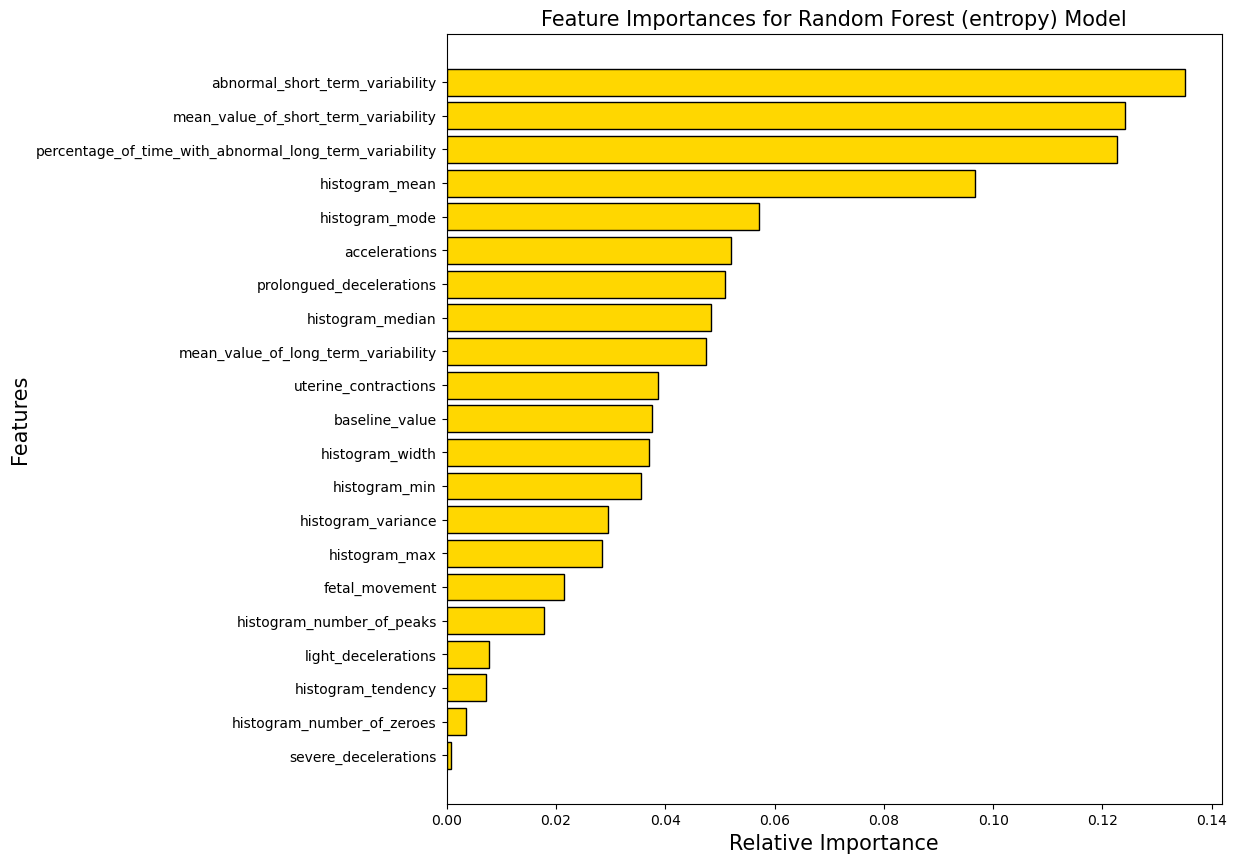

In [45]:
features = dfX
importances = list(rf.feature_importances_)

tab=pd.DataFrame(list(zip(dfX,importances)), columns=['Features','Importance scores']).sort_values(by=['Importance scores'], ascending=False)
 
print(tab)

#visualize the features
plt.figure(figsize=(10,10))

tab.sort_values(by=['Importance scores'], ascending=True, inplace=True)
indices = tab['Features'].values.tolist()
importances = tab['Importance scores'].values.tolist()
features = tab['Features'].values.tolist()

_=plt.barh(indices,importances, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(indices, features)
plt.title('Feature Importances for Random Forest (entropy) Model',fontsize=15)
plt.savefig("29.png")
plt.show()


RESULTS:
The top three features that predicts the fetal health classification are:
- abnormal_short_term_variability
- mean_value_of_short_term_variability
- percentage_of_time_with_abnormal_long_term_variability


**B. HYPERPARAMETER TUNING FOR RANDOM FOREST (ENTROPY) SMOTE USING RandomSearchCV**

In [46]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [47]:
# Commented out to prevent rerunning due to time.

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)# Fit the random search model
#rf_random.fit(Xtrain_res, ytrain_res)

#rf_random.best_params_
#rf_random.best_score_   #0.980095742000504

Results:

```
Fitting 3 folds for each of 100 candidates, totalling 300 fits

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}
 ```

In [48]:
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features= 'sqrt', max_depth=110, bootstrap=False)

rf.fit(Xtrain_res, ytrain_res)
y_predict_rf = rf.predict(Xtest)

Accuracy_rf = accuracy_score(ytest,y_predict_rf)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf = recall_score(ytest,y_predict_rf,average='weighted')
print("Recall: "+str(Recall_rf))
Precision_rf = precision_score(ytest,y_predict_rf,average='weighted')
print("Precision: "+str(Precision_rf))
F1_rf = f1_score(ytest,y_predict_rf,average='weighted')
print("F1: "+str(F1_rf))

Accuracy: 0.9295774647887324
Recall: 0.9295774647887324
Precision: 0.9287035023109206
F1: 0.9291024876260429


In [49]:
tuned_df=tuned_df.append({'Algorithm':'Random Forest(entropy)(SMOTE)','Accuracy score': Accuracy_rf,'Recall score': Recall_rf,'Precision score':Precision_rf,'F1 score':F1_rf}, ignore_index = True)

C:\Users\charr\AppData\Local\Temp\ipykernel_16196\2320285042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuned_df=tuned_df.append({'Algorithm':'Random Forest(entropy)(SMOTE)','Accuracy score': Accuracy_rf,'Recall score': Recall_rf,'Precision score':Precision_rf,'F1 score':F1_rf}, ignore_index = True)


                                             Features  Importance scores
9   percentage_of_time_with_abnormal_long_term_var...           0.127952
7                     abnormal_short_term_variability           0.122235
17                                     histogram_mean           0.109764
18                                   histogram_median           0.080230
1                                       accelerations           0.080064
8                mean_value_of_short_term_variability           0.072576
6                            prolongued_decelerations           0.067370
10                mean_value_of_long_term_variability           0.050223
16                                     histogram_mode           0.048615
0                                      baseline_value           0.042910
19                                 histogram_variance           0.034075
11                                    histogram_width           0.028859
13                                      histogram_m

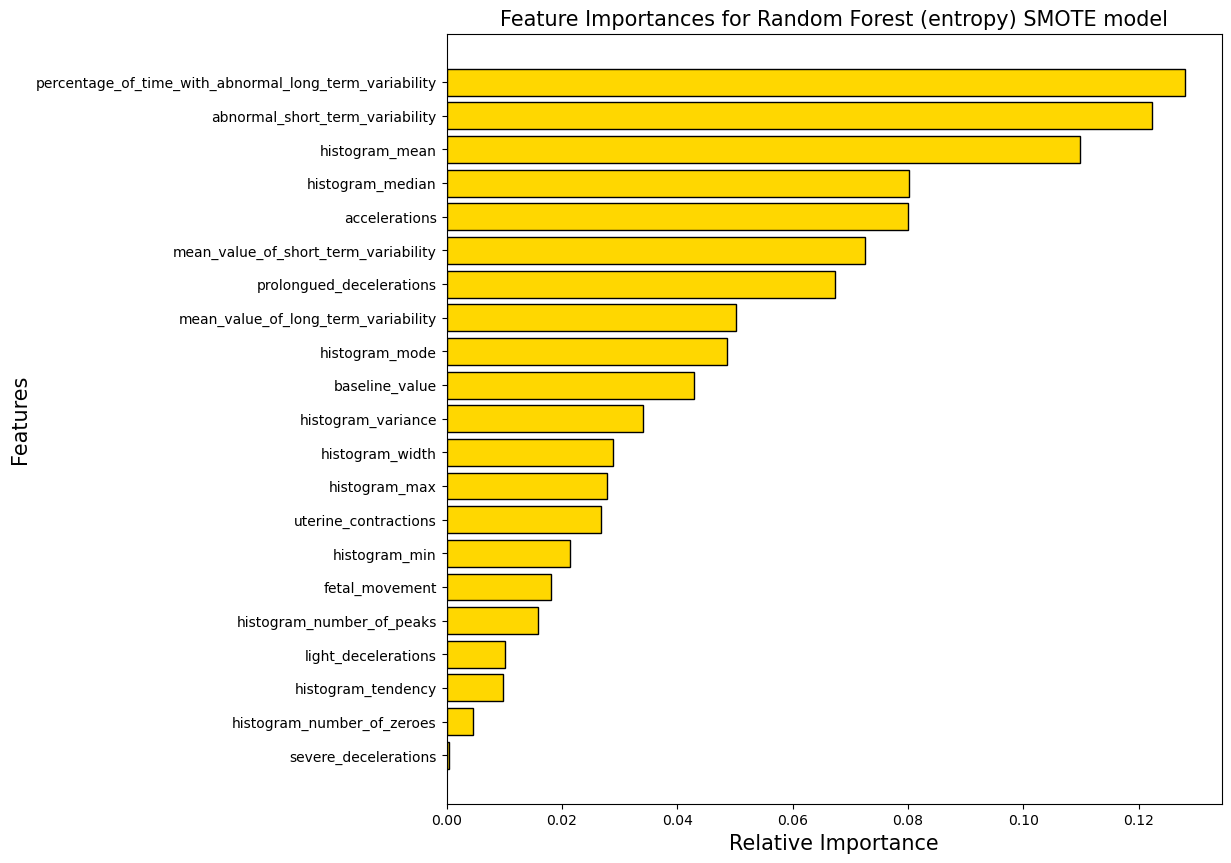

In [50]:
features = dfX
importances = list(rf.feature_importances_)

tab=pd.DataFrame(list(zip(dfX,importances)), columns=['Features','Importance scores']).sort_values(by=['Importance scores'], ascending=False)
 
print(tab)

#visualize the features
plt.figure(figsize=(10,10))

tab.sort_values(by=['Importance scores'], ascending=True, inplace=True)
indices = tab['Features'].values.tolist()
importances = tab['Importance scores'].values.tolist()
features = tab['Features'].values.tolist()

_=plt.barh(indices,importances, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(indices, features)
plt.title('Feature Importances for Random Forest (entropy) SMOTE model',fontsize=15)
plt.savefig("29.png")
plt.show()

RESULTS: The top three features that predicts the fetal health classification are:

- percentage_of_time_with_abnormal_long_term_variability
- abnormal_short_term_variability
- histogram_mean



**C. HYPERPARAMETER TUNING FOR GRADIENT BOOST SMOTE USING RandomGridSearchCV**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Results captured below.  Commenting out to reduce recalculation of the workbook.

# Commented out to prevent rerunning due to time.
#GB = GradientBoostingClassifier()
gb_param = {
    'subsample': [0.8],
    'learning_rate': [0.04, 0.05, 0.06], 
    'n_estimators': [140, 160, 180], 
    'random_state': [5], 
    'max_depth': [8, 9, 10], 
    'max_leaf_nodes': [90, 100, 110]
}

#gsGB = RandomizedSearchCV(GB, param_distributions = gb_param, cv=3, n_iter=100, n_jobs= -1, verbose = 2, random_state=2)
#gsGB.fit(Xtrain_res,ytrain_res)
#print(gsGB.best_estimator_)
#print(gsGB.best_score_)

Results:
```
Fitting 3 folds for each of 81 candidates, totalling 243 fits
GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_leaf_nodes=110,
                           n_estimators=180, random_state=5, subsample=0.8)
0.9790879314688837
```

In [52]:
GB = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_leaf_nodes=110,
                           n_estimators=180, random_state=5, subsample=0.8)

#Predict using the model:
GB.fit(Xtrain_res, ytrain_res)
y_predict_gbc = GB.predict(Xtest)

Accuracy_gbc = accuracy_score(ytest,y_predict_gbc)
print("Accuracy: "+str(Accuracy_gbc))
Recall_gbc = recall_score(ytest,y_predict_gbc, average='weighted')
print("Recall: "+str(Recall_gbc))
Precision_gbc = precision_score(ytest,y_predict_gbc,average='weighted')
print("Precision: "+str(Precision_gbc))
F1_gbc = f1_score(ytest,y_predict_gbc, average='weighted')
print("F1: "+str(F1_gbc))

Accuracy: 0.931924882629108
Recall: 0.931924882629108
Precision: 0.9308142978604173
F1: 0.9311891422778102


In [53]:
tuned_df=tuned_df.append({'Algorithm':'Gradient Boost(SMOTE)','Accuracy score': Accuracy_gbc,'Recall score': Recall_gbc,'Precision score':Precision_gbc,'F1 score':F1_gbc}, ignore_index = True)

C:\Users\charr\AppData\Local\Temp\ipykernel_16196\3388931320.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuned_df=tuned_df.append({'Algorithm':'Gradient Boost(SMOTE)','Accuracy score': Accuracy_gbc,'Recall score': Recall_gbc,'Precision score':Precision_gbc,'F1 score':F1_gbc}, ignore_index = True)


                                             Features  Importance scores
9   percentage_of_time_with_abnormal_long_term_var...           0.271332
7                     abnormal_short_term_variability           0.253091
17                                     histogram_mean           0.202921
1                                       accelerations           0.077726
6                            prolongued_decelerations           0.040268
13                                      histogram_max           0.030624
0                                      baseline_value           0.015532
8                mean_value_of_short_term_variability           0.014398
3                                uterine_contractions           0.014152
12                                      histogram_min           0.012492
14                          histogram_number_of_peaks           0.011875
16                                     histogram_mode           0.010502
18                                   histogram_medi

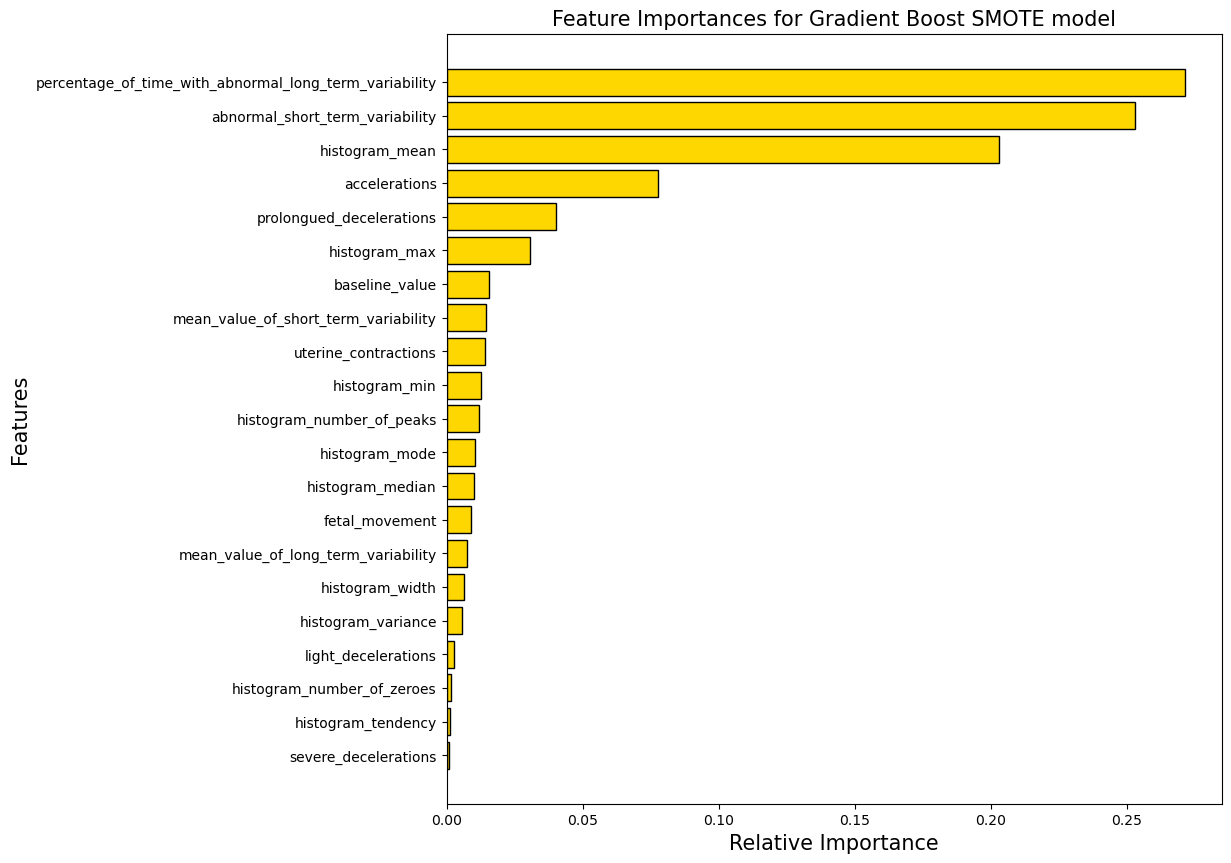

In [54]:
features = dfX
importances = list(GB.feature_importances_)

tab=pd.DataFrame(list(zip(dfX,importances)), columns=['Features','Importance scores']).sort_values(by=['Importance scores'], ascending=False)
 
print(tab)

#visualize the features
plt.figure(figsize=(10,10))

tab.sort_values(by=['Importance scores'], ascending=True, inplace=True)
indices = tab['Features'].values.tolist()
importances = tab['Importance scores'].values.tolist()
features = tab['Features'].values.tolist()

_=plt.barh(indices,importances, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(indices, features)
plt.title('Feature Importances for Gradient Boost SMOTE model',fontsize=15)
plt.savefig("29.png")
plt.show()


RESULTS: The top three features that predicts the fetal health classification are:

- percentage_of_time_with_abnormal_long_term_variability
- abnormal_short_term_variability
- histogram_mean 

In [57]:
display(tuned_df.sort_values('F1 score', ascending=False))

,Algorithm,Accuracy score,Recall score,Precision score,F1 score
2,Gradient Boost(SMOTE),0.931925,0.931925,0.930814,0.931189
0,Random Forest(entropy),0.931925,0.931925,0.930258,0.930903
1,Random Forest(entropy)(SMOTE),0.929577,0.929577,0.928704,0.929102


**Final Results of the Hyperparameter Tuning**

After hyperparameter tuning the top three algorithms, **Gradient Boost (SMOTE)** and **Random Forest (Entropy)** showed the best results which is as follows:

Both algorithms have the same Recall and Accuracy Score:
- Accuracy: 0.9319
- Recall: 0.9319

Based on the Precision and F1 Score the **Gradient Boost (SMOTE)** is the best model:
- Precision: 0.9308
- F1: 0.9311

The top three feature importances that predicts the fetal health classification based on **Gradient Boost (SMOTE)** are:
- percentage_of_time_with_abnormal_long_term_variability
- abnormal_short_term_variability
- histogram_mean

The top three models showed that whether the model underwent SMOTE or not, the results are still fairly close in Accuracy, Recall, Precision and F1. Despite the different ranking, the features of importance had almost the same results.

### SUMMARY

After the data wrangling, EDA and preprocessing of the fetal health classification dataset, we identified this is an unbalanced Multiclass Classification.

A Multiclass Classification is a classification with more than two classes, and each sample can only be labeled as one class. In multiclass classification, each record belongs to one of three or more classes, and the algorithm's goal is to construct a function which, given a new data point, will correctly identify the class into which the new data point falls.
To handle this particular problem, we can use a machine learning algorithm for multiclass classification like Neural Networks, Naive Bayes, and SVM.

Imbalanced dataset in a multiclass classification means, if one class has overwhelmingly more samples than another, it can be seen as an imbalanced dataset. That is, a classification problem where the classes are not represented equally. This imbalance causes two problems: Training is inefficient as most samples are examples that contribute no useful learning signal. The examples can overwhelm training and lead to degenerate models. 

We have chosen to use the SMOTE method to handle the class imbalance. Oversampling is one of the most widely used techniques to deal with imbalance classes. In SMOTE, we generate synthetic samples for minority classes to make sure we have enough data to train the model.

First, we chose seven different models to apply the fit method. We chose Keras Neural Network Model, Random Forest (entropy), Random Forest (Gini), Gradient Boost, Naïve Bayes, SVM (Polynomial) and SVM (RBF).

**After training the data using the different algorithms and applying them to the test data, the results are as follows:**

The top three algorithms without SMOTE based on Recall:

- Random Forest (Entropy)   Recall:0.9366
- Random Forest (Gini)   Recall:0.9295
- Gradient Boost   Recall:0.9225

The top three algorithms using SMOTE based on Recall are:

- Gradient Boost (SMOTE)    Recall: 0.9342
- Random Forest (Entropy)(SMOTE)    Recall:0.9319
- Random Forest (Gini) (SMOTE)    Recall: 0.9272

The top three algorithms without and with using the SMOTE Method based on Recall are:

- Random Forest (Entropy)    Recall: 0.9366
- Gradient Boost (SMOTE)    Recall: 0.9342
- Random Forest (Entropy)(SMOTE)    Recall: 0.9319

**In order to understand these algorithms, let us talk about Random Forest and Gradient Boost.**

Random Forest is a type of ensemble learning method for classification, regression, and other tasks. Random Forests works by constructing many decision trees at a training time. The way that this works is by averaging several decision trees at different parts of the same training set.

Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data. In the context of Decision Trees, entropy is a measure of disorder or impurity in a node. Thus, a node with more variable composition, such as 2Pass and 2 Fail would be considered to have higher Entropy than a node which has only pass or only fail.

Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.

There are two main differences between the gradient boosting trees and the random forests. We train the former sequentially, one tree at a time, each to correct the errors of the previous ones. In contrast, we construct the trees in a random forest independently.

**These models will be undergoing Hyperparameter Tuning.**

After hyperparameter tuning the three top algorithms, **Gradient Boost (SMOTE)** and  **Random Forest (Entropy)** showed the best results which is as follows:

Both algorithms have the same Recall and Accuracy Score:
- Accuracy: 0.9319
- Recall: 0.9319

Based on the Precision and F1 Score the **Gradient Boost (SMOTE)** is the best model:
- Precision: 0.9308
- F1: 0.9311

**Comparison of the EDA’s correlation of features with fetal health and the actual outcome from the top model are:**

From the EDA, the correlation of the different features against fetal_health and the top three that have the strongest correlation with fetal_health are:
- prolongued_decelerations
- abnormal_short_term_variability
- percentage_of_time_with_abnormal_long_term_variability

After modeling and hyperparameter tuning, the outcomes in the test dataset are as follows:

The top three features of importance that predicts the fetal health classification based on **Gradient Boost (SMOTE)** are:
- percentage_of_time_with_abnormal_long_term_variability
- abnormal_short_term_variability
- histogram_mean

**Gradient Boost (SMOTE)** is the best of all the algorithms performed that would accurately predict fetal health outcomes accurately using Cardiotocograms (CTGs) data to prevent or decrease child and maternal mortality.

**Recommendations to Client based on the Results:**

The goal is to predict fetal outcomes using CTGs in order to prevent or decrease child and maternal mortality. 

The features measured many trends in fetal heart rate such as variations, accelerations and decelerations and histogram values of the heart rates. As well as uterine contractions and fetal movements. 

CTGs are cost-effective and highly accessible around the world, even in places where healthcare might be harder to access. 
Using the Gradient Boost (SMOTE) model, the CTG can be easily inputted and classified, which can help reduce child mortality. On top of that, many places around the world can obtain access to these machines without having to worry about finding an expert obstetrician who can read the measurements from the machine learning algorithm. A simple, easy to use model such as the one created will encourage the use of more CTGs, thereby further preventing child mortality and allowing early diagnoses of many different fetal conditions.

Using machine learning models, fetal health classifications can be made without the presence of obstetricians and in a much timelier manner. These models can be highly accurate in their predictions, making them viable solutions to the problem of fetal health, while this solution works theoretically, there are still some major issues with implementing machine learning models.

In our best model Gradient Boost (SMOTE), the features of importance are:
- Percentage of time with abnormal long term variation, which is a similar measurement to short term variability except for the duration of time. 
- Abnormal short term variability or STV is a measurement of the beat-to-beat variation in the fetal heart rate, and the CTG keeps track of the number of times the variation is abnormal in a fetus.
- The histogram values represent the baby’s heart rates that were measured, all plotted on a histogram.

Why this model is highly recommended:
- This model would be able to accurately predict which measurements from the cardiotocogram were the most influential in the predictions for feature importance.
- This model will certainly be beneficial for clinical use and will allow healthcare providers to specify their diagnosis and treatment specifically towards the detected problem specially for suspect and pathological categories.


**Future Investigation:**

The models showed wonderful results but there is always room to grow and improve the models:
- Feature engineering using PCA
- Other Cross Validation techniques like Stratified K-Fold Cross Validation method, Combination of Random Search Cross Validation and Grid Search Cross Validation method
- Techniques to check outliers and reduce possible bias for the dataset
- Using Keras Neural Networks methods with hyperparameter tuning using more epochs, different batch sizes and optimizers
- Using SHapley Additive exPlanations (SHAP), Local Interpretable Model Agnostic Explanations (LIME) and Feature Altering for explanations of Black box models (FAB) are explainability methods to increase interpretability of the results returned by the machine learning model and to determine which features from the data are most influential when making a prediction and this will lead to both patients and medical professionals to trust the classifications made by the model
- Investigation of other techniques or methods by taking into consideration computational complexity, cost effectiveness and maintenance cost